# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import TaskDefault

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = TaskDefault(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

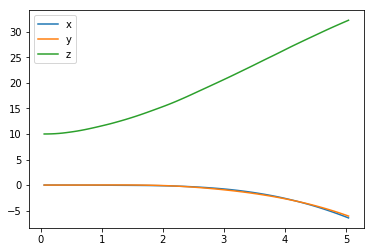

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

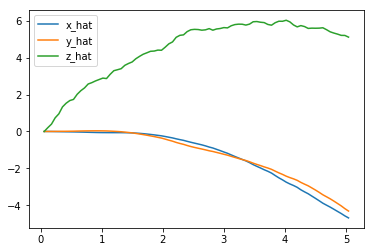

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

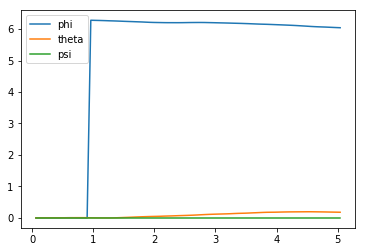

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

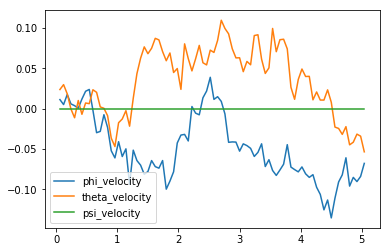

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

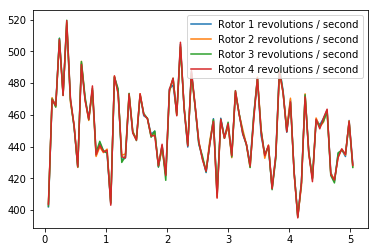

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.43182044  -6.07183439  32.26763579   6.04259789   0.18006606   0.        ]
[-4.68602924 -4.31455798  5.11256817]
[-0.06766508 -0.05333823  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [14]:
import sys
import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from task import TaskDefault

num_episodes = 500
init_pose = np.array([0., 0., 10.0, 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = TaskDefault(init_pose=init_pose, target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =  -1.165 (best =   0.151), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

# Flying Virtual Copters with DDPG Agents

## Method

### 1. Agent Design

The following section details the method used for design of the agent, and a description of the default agent provided with this project.

### 1.1 The Default DDPG Agent

The agent, actor-critic DDPG with advantage, provided with this project can be enabled with a simple switch for comparision against other agents.

### 1.2 My DDPG Agent

It was often hard to work out how much of the bad behavior was due to the agent, and how much was due to the task it was given. The biggest challeged with the agent seemed to have it get suck in local minimum, and repeat such actions forever. To mitigate these effects I did the following:

* Used the default experience replay buffer, so that the search space is better sampled before the agent tried to learn anything.
* Used an average reward from the calculated at the step of the agent, not the learn, so it actually matches the episode, unlike learn, which is randomly sampled
* Modified to OU noise provided to add in a simulated annealing type effect, where the OU noise mean and sigma is reduced by 1% each time a better average reward for an episode is found
* Much more noise to have better more exploration. After looking at many RPM plots and reverse engineering the code, and with cross checking with references online, it seems as though all the noise values are RPMs, so the initial noise settings seem far too small to be meaningful. Combined with simulated annealing, reducing the OU noise each time there is a best score found.
* Changed the sigmoid for a tanh, at least for some trials. This allow negative action spaces to be used, allowing negative RPMs and generally seems to help the agent perform better at its tasks. Negative actions RPMs allow the drone to fly up even if it happens to flip upside-down (which seems difficult to avoid, especially given the simple nature of the physics sim). This was a big impovement for the agent's abilities as it greatly increased its options to go up even while upsidedown, which is otherwise impossible. Other references show this activation as useful for continuous action spaces: "The networks for the low-dimensional state-space problems are pretty simple, though. For the actor network, the output is a tanh layer scaled to be between [−b,+b],b∈R. This is useful when your action space is on the real line but is bounded and closed, as is the case for the pendulum task." [1]. The downside is that with this activation function, training seemed slower than sigmoid (probably because there are two expodentials instead of one), and also, because of the negativity of the activation function, even if you bound the action space to values above 0 in the parameters, the range of tanh will allow negative RPMs anyway. At least this helped me to realize that negative RPMs were a useful ability for the agent. In the end I stayed with the sigmoid function, but expanded the action range to include negative RPMs.

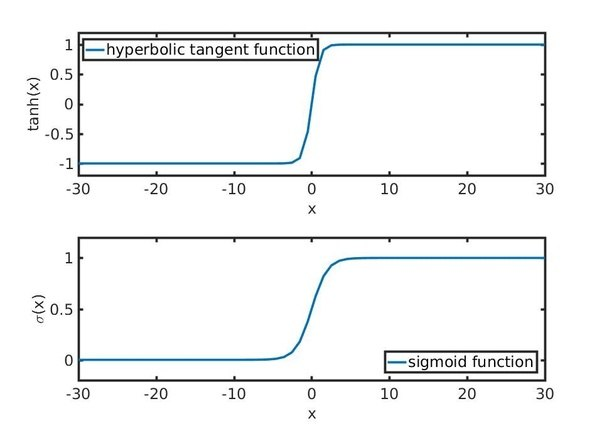

To further help with overfitting to local minimum and maximum, I used the following to help with regularize the network.

* More nodesfor both actor and critic to handle the complexity of the physics engine. This was especially important as the agent had to fight the terminal condition of intial z position of 0, as I foolishly thought the task was to take off from the ground. Only later did I realize that z = 0 was actually a condition to end the simulation, so any small dip below from the starting position would give very hard bad incentives to the agent, often leaving it suck creating a terminal condition after a single time step for hundreds of frames. This makes the take off task a very bad starting point for this project. A simplier and more stable action is a better place to begin.
* ([2]) Dropout as a simple regularization technique used often in supervised learning, this seems to help overfitting, especially as I added more layers in an created a more complex DNN.
* (Tried and discarded, as it seems to make the agent unable to learn anything) Batch Normalization to each dense layer of the actor and critic networks, to normalize the input space, as recommended in  "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", where they state "Batch Normalization allows us to use much higher learningrates and be less careful about initialization". As per the paper, this appears to allow faster update parameters gamma, discount factor, and tau, for soft update of target parameters. Have to be careful to remove the bias term from the dense layers (https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/).

        class Actor:
            """Actor (Policy) Model."""

        def build_model(self):
            """Build an actor (policy) network that maps states -> actions."""
            # Define input layer (states)
            states = layers.Input(shape=(self.state_size,), name='states')

            # Add hidden layers
            
            net = layers.Dense(units=64, use_bias=False, activation='relu')(states)
            #[doesn't work well]net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Dropout(0.1)(net)
            
            net = layers.Dense(units=128, use_bias=False, activation='relu')(net)
            #[doesn't work well]net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Dropout(0.1)(net)
            
            net = layers.Dense(units=128, use_bias=False, activation='relu')(net)
            #[doesn't work well]net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Dropout(0.1)(net)
            
            net = layers.Dense(units=64, use_bias=False, activation='relu')(net)
            #[doesn't work well]net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Dropout(0.1)(net)

            # Add final output layer with sigmoid activation   
                raw_actions = layers.Dense(units=self.action_size, activation='tanh',
                                           name='raw_actions')(net)

        class Critic:
            """Critic (Value) Model."""

        def build_model(self):
            """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
            # Define input layers
            states = layers.Input(shape=(self.state_size,), name='states')
            actions = layers.Input(shape=(self.action_size,), name='actions')

            # Add hidden layer(s) for state pathway
            net_states = layers.Dense(units=64, use_bias=False, activation='relu')(states)
            #net_states = layers.BatchNormalization()(net_states) #(SMM) 
            net_states = layers.Dropout(0.1)(net_states)
            
            net_states = layers.Dense(units=128, use_bias=False, activation='relu')(net_states)
            #net_states = layers.BatchNormalization()(net_states) #(SMM) 
            net_states = layers.Dropout(0.1)(net_states)

            # Add hidden layer(s) for action pathway
            net_actions = layers.Dense(units=64, use_bias=False, activation='relu')(actions)
            #net_actions = layers.BatchNormalization()(net_actions) # (SMM) seems to help smooth results
            net_actions = layers.Dropout(0.1)(net_actions)
            
            net_actions = layers.Dense(units=128, use_bias=False, activation='relu')(net_actions)
            #[doesn't work well]net_actions = layers.BatchNormalization()(net_actions) #(SMM) 
            net_actions = layers.Dropout(0.1)(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=32, activation='relu')(net)
            net = layers.Dropout(0.1)(net)
            net = layers.Activation('relu')(net)


        # Parameters            
        self.exploration_mu = 0# postive mean noise to avoid negative RPMs, original 0
        self.exploration_theta = 0.15 # 0.01 seems to not suck # original 0.15
        self.exploration_sigma = 0.2 # 0.01 seems to not suck # oringal 0.2
        self.noise = OUNoise(self.action_size, self.exploration_mu, self.exploration_theta, self.exploration_sigma)

        # Replay memory
        self.buffer_size = 100000
        self.batch_size = 64 # (SMM) default 64, might watch to use a bigger batch, esp with batch norm
        self.memory = ReplayBuffer(self.buffer_size, self.batch_size)

        # Algorithm parameters
        self.gamma = 0.99 # (SMM) 0.99  # discount factor
        self.tau = 0.01 # (SMM) 0.01  # for soft update of target parameters     
       

### 2. Task Design

The part was tricky. What behavior am I exactly incentivizing? How will the agent respond to these positive and negative incentives? For example, often I get caught in local minimum with the agent getting in the habit of quickly getting some rewards, then crashing into the ground as quickly as possible to get the best overall average reward. 

Since the reward will affect the network training, any spikes, positive or negative, in the reward function can lead to unstable training results. To ensure that the reward function results are stable, no matter what, I tried clipping all my custom reward functions to a range of around [-1, 1], though it was hard to make a reward function that would stay in this range while also being smooth and continuous. This didn't really seem to help much.

A set range does however make the tuning of the learning parameters easier, since the learning rates and reward levels are coupled as part of the learning. However, capping the results leads to step functions inside the reward function instead of continous space, meaning that the changes are sudden instead of gradual, and it is harder for the network to learn [Reference 4]. Therefore, how to normalize the reward function to make it continous across the action space was a significant concern. Normalizing it so that is was independent of starting position and goal position, and so it had a rather neural beginning, suffered if it went relatively awy, and rewards handsomely for approaching the target, was a real challenge.

Five different tasks will be looked into: default hover, custom hover, custom hover with randomized starting location, take off, and fly higher (in the end the easiest). To better compare however tasks, the same starting location and goal location will be used to compare several combinations of tasks and agents for comparison.

#### The Physics Engine

We now have to deal with a physics engine, which is nothing like anything taught in the course thus far, and it not without its bugs. 

For example, spiking velocity gradients at the edges of the world creating crazy reward funcion spike, hence the need to clip the reward to a max and min value. Furthermore, we shouldn't allow the drone to go below the ground, but allow it to push down against it for take-off, as having the drove push against the ground should not be a terminal condition. In the real world droves don't blow up if places on the ground (hitting with high speed is another story).

A summary of analysis of different fixed RPMs for all rotors, and their affect on the sim with a starting height of 10m is as follows:
* 1000 RPM goes up very quickly, too quickly to be stable
* 500 RPM goes up at a more moderate pace
* 100 RPM makes the drone go down after 1.4 seconds
* 200 RPM in 1.5 seconds
* 300 RPM crashes in 2.0 seconds
* 400 RPM goes down to a height of ~7m in 5 seconds

Even a fixed 400 RPM value shows x and y diverging, even though this should not be possible. In the absence of wind or non-uniform air drag on the agent, fixed RPMs for all rotors should keep the x and y position fixed. There is clearly a bug or two in this agent other than other already explained above regarding exploding velocity and acceleration gradients, among others. 

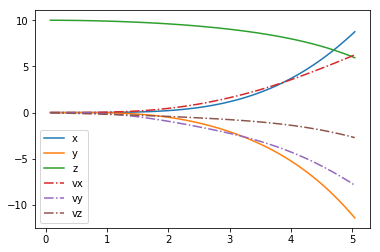

Understanding how the RPMs of the rotors interact with the environment is important to understand the project, and should be better described in this project by Udacity.

The next challenge was getting an insight into all the signals and their units. Since there is basically not documentation or comments in the code, this had to be reverse engineered from source based on my own knowledge of physics and mathematics. For example, are the angles in radians or degrees? about which axii to the rotation angles and their derivatives refer to? Are the rotation angles 2 pi phase wrapping around the circle? If so, how can I used them as part of the reward function with any stability? Even with a Mechatronics degree this was pretty hard to work out. This part really, really needs to be improved.

In fight into the signals for angles shows the following tendency of the done to flip about. However, without actually seeing the agent in a 3D simulator, it is hard to know if there is actually a bug, are an artifact of bugs in the physics engine leading to 2 pi phase wrap around the unit circle. It seems like this is actually an upsidedown drone, as when it is upsidedown it seems that its height always decreases if the done cannot use negative RPMs.

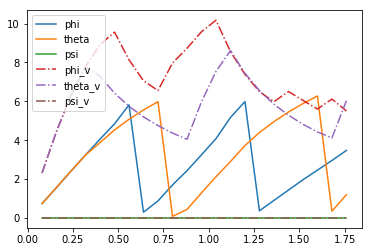


## Experiments


### 3.1 Hover (Default Agent, Default Task)

Train the default agent using the default task and reward function provided in this project. 

* Inital positon: (0, 0, 10)
* Target position: (0, 0, 10)
* Reward Function: 1. - .3 * (abs(self.sim.pose[:3] - self.target_pos)).sum(), as provided
* 1000 Episodes
* 5s per episode

The agent make some tendency to learn how to fly, however is unable to avoid flipping upside down, at which point the agent l. Below are some select plots from a particular run.

Episode 2 (first episode with learning from memory):

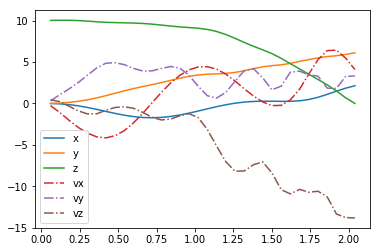
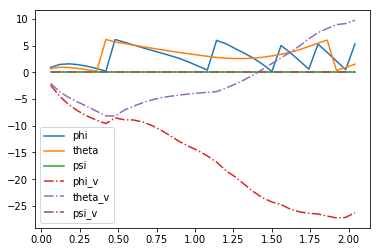
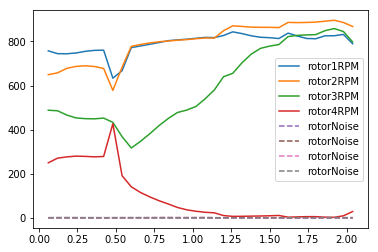
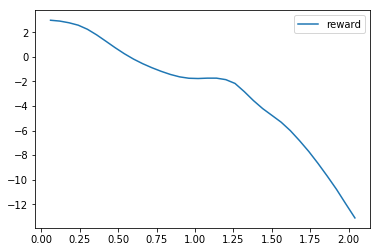

Episdoe 1000:

The angle shows a tendency to flip upside down, and this seems to be its downfall, as this did not correct by episode 1000. The behavior smoothed out a lot, and x and y position stay fairly close to center despite flipping over again and again.

Epi: 1000, score: -0.02924 (best: 0.05883) in epi 181, cnt:

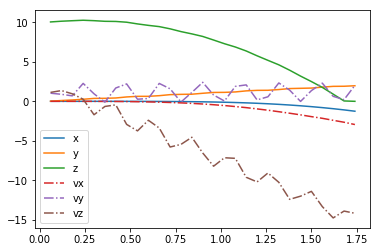
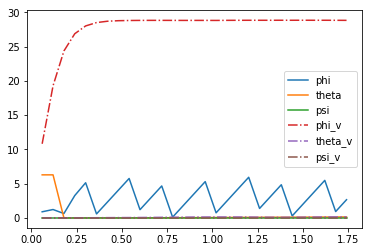
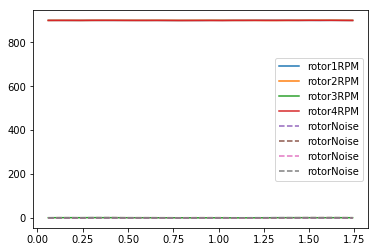
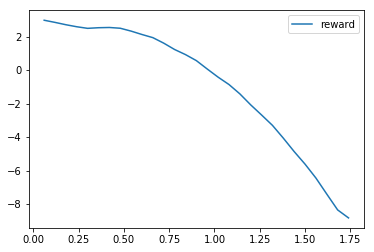

Based on the mean and sum rewards for all episodes, the agent also seems to get stuck a lot

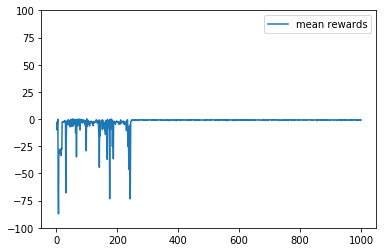
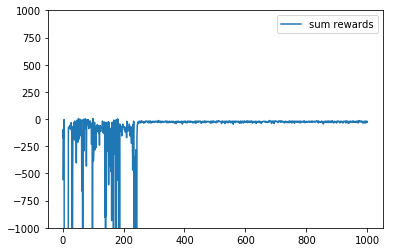


### 3.2 Hover (Custom Agent, Default Task)

* Inital positon: (0, 0, 10)
* Target position: (0, 0, 10)
* Reward Function: 1. - .3 * (abs(self.sim.pose[:3] - self.target_pos)).sum(), as provided
* Agent: My DDPG agent described above
* 1000 Episodes
* 5s per episode

<agents.agent.DDPG object at 0x0000019B1D925FD0>
<task.TaskDefault object at 0x0000019B18611710>
init_pose:  [0. 0. 10. 0. 0. 0.]
target_pose:  [0. 0. 10.]
Epi:   80, score:    -inf (best: -9999.00000) in epi 0, cnt:0found best score of 0.007804 reducing exploration noise mean bias to 29.70
found best score of 0.007804 reducing exploration noise sigma to 9.90
Epi:   81, score: -0.01335 (best: 0.00780) in epi 81, cnt:1

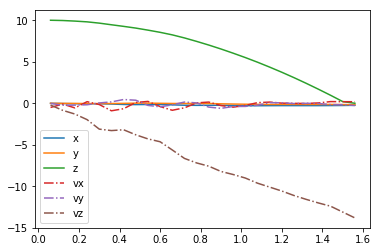
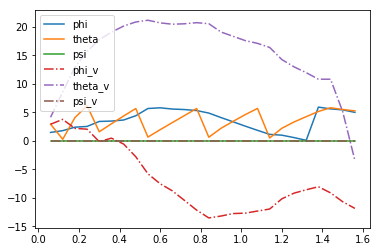
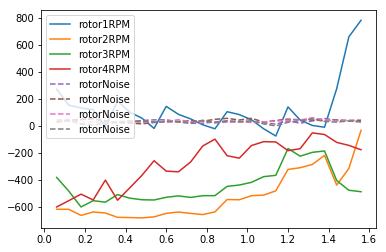
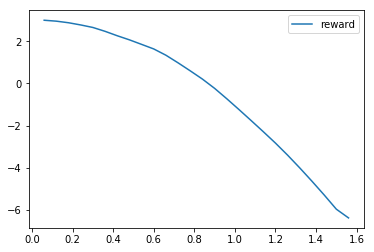

Results at episode 1000 show that default a different agent, with more layers and other featuers, performance did not really improve. The flipping upside down function is still there. Though the agent at least found a strategy that lasts for the whole simulation. Note how the use of the tanh activation function on the actor allows negative RPMs, even though the task itself is capped between 0-900 RPM. Therefore, the action space cap cannot apply if the tanh activation is used.

Epi: 1000, score: -5.97718 (best: 0.02789) in epi 253, cnt: 3

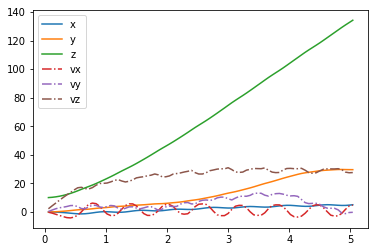
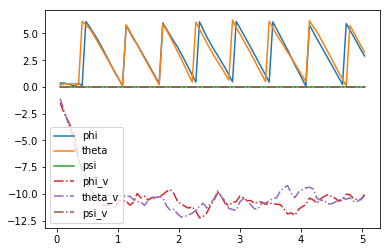
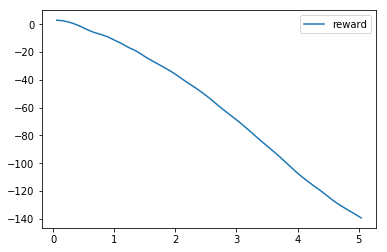
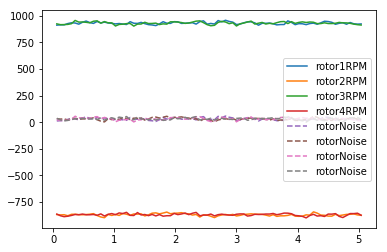

The agent did seem to get stuck less though, so the agent architecture seems to have helped with local minimum.

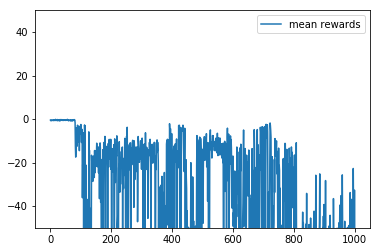
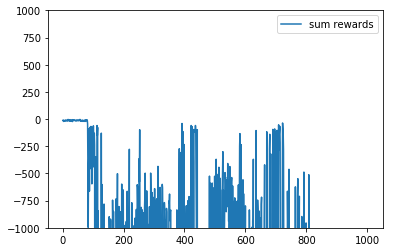

After this, dropout was reduced from 0.3 to 0.1 at each layer to try to reduce the variance in the reward function.

### 3.3 Hover (Default Agent, Custom Task V1.0)

This agent runs much faster, due to the smaller network size, and especially due to the use of sigmoid instead of tanh for the activation function of the actor. Therefore, this makes a good test ground for different tasks. As shown above, a better agent alone cannot by itself yeild better results necessarily. 

The reward function seems to be the most critical component, as long as the network architecture has enough capability to solve the problem. As can be seen even on the initial plots, the reward function is much smoother.

        reward = 1 - (0.003 * r**2) # distance penalty     

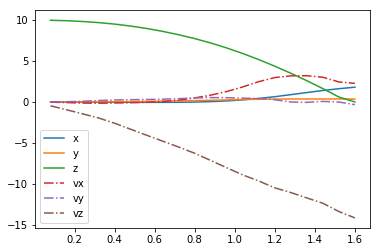
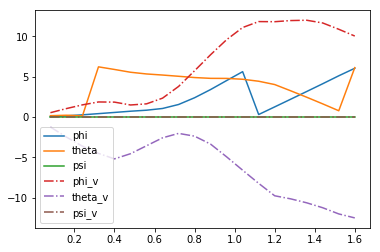
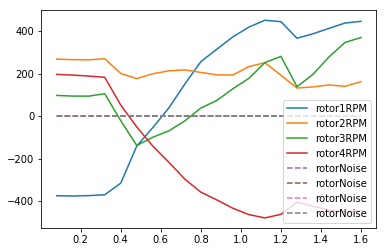
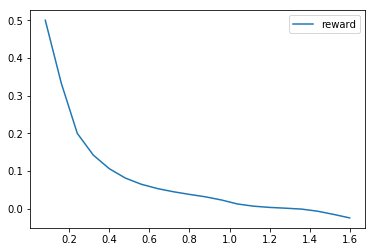

The agent seems to perform a little better, but still not great after 1000 episodes.

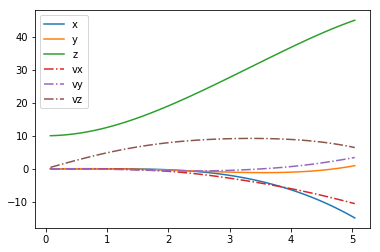
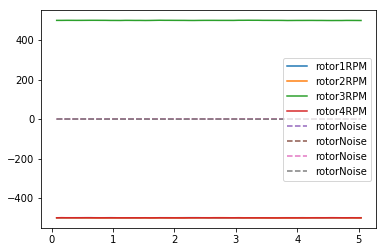
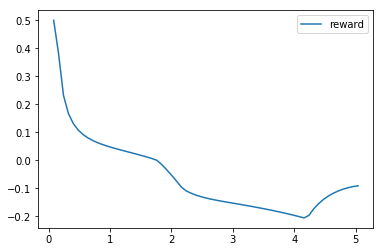
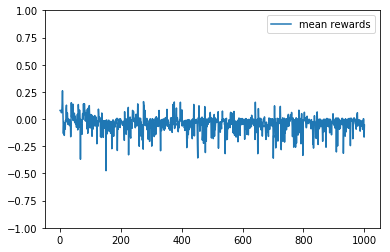

The rewards are at least less stuck, probably owing to the custom reward function that is nicely continuous. But still, the agent is not impressive.


### 3.4 Fly to Goal (Custom Agent, Custom Task V2.0)

Not having much progress with hover, I decided to do a different goal, of flying to a point instead. In this way, it is easier to reward the agent highly once they are close to the goal. With the hover goal, since the agent starts at the goal, it is harder to reward them for actually achieve the goal, which is somewhat ill-defined, as the agent somehow has to not move, but its state is only pose, which doesn't give it any sense of how long it is meant to hover for.

Turn batch normalization off for all layers in the actor and critic networks. This seemed to help a lot. Despite literature saying this should help, as soon as it was off, performance got a lot better.

This combined with a rewarded reward function, and the agent finally succeeded, with my custom agent and default agent usually succeeding in around 20-40 episodes.

        x0 = self.sim.init_pose[0]
        y0 = self.sim.init_pose[1]
        z0 = self.sim.init_pose[2]
        x = self.sim.pose[0]
        y = self.sim.pose[1]
        z = self.sim.pose[2]
        xg = self.target_pos[0]
        yg = self.target_pos[1]
        zg = self.target_pos[2]
        dx = x - xg
        dy = y - yg
        dz = z - zg
        
        # compute current and inital distances to the goal
        r = np.sqrt(dx*dx + dy*dy + dz*dz)
        r0 = np.sqrt(np.power(x0-xg,2.) + np.power(y0-yg, 2.) + np.power(z0-zg, 2.))

        # setup initial position as reward 0
        reward = r0 - r
                
        # reward more if closer to goal
        if r < r0:
            reward += 1/max(0.01, (r/r0)**4)# check for div 0

        # end if very close to goal
        if r < r0/4:
            reward = 2.0*reward
            self.sim.done = True
            self.goalReachedCount += 1 
            print("\n\nGOAL REACHED! Distance: ", r)
        
        # penalize harshly if about to crash / exit the sim
        if z < 2:
            reward -= 10
            self.sim.done = True 
        if abs(x) > 145:
            reward -= 10
            self.sim.done = True 
        if abs(y) > 145:
            reward -= 10
            self.sim.done = True 
        if z > 250:
            reward -= 10
            self.sim.done = True     
        
        # early exit if score too bad
        if r > 1.5 * r0:
            reward -= 5
            self.sim.done = True                

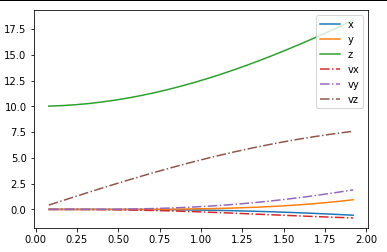

## Final Code Execution

init_pose:  [  0.   0.  10.   0.   0.   0.]
target_pose:  [  0.   0.  20.]
Epi:    1, score: -29.64831 (best: -0.03951) in epi 1, BestEpiCnt: 1, goalCnt: 0


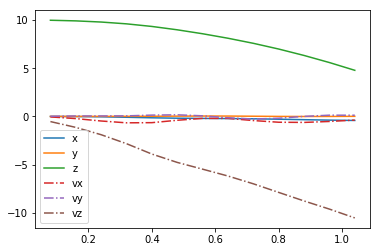

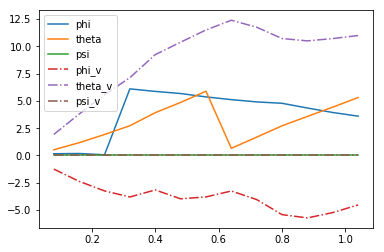

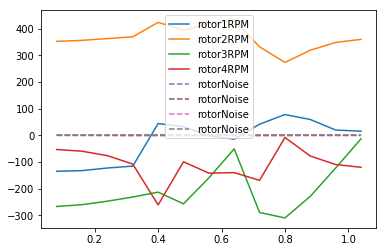

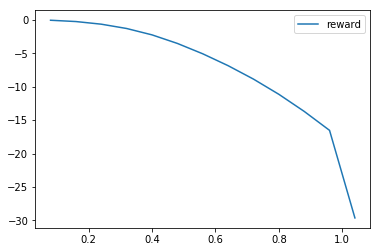

Epi:    2, score: -29.64780 (best: -0.03951) in epi 1, BestEpiCnt: 1, goalCnt: 0
Epi:    3, score: -29.64954 (best: -0.03951) in epi 1, BestEpiCnt: 1, goalCnt: 0
Epi:    4, score: -29.64979 (best: -0.03950) in epi 4, BestEpiCnt: 2, goalCnt: 0


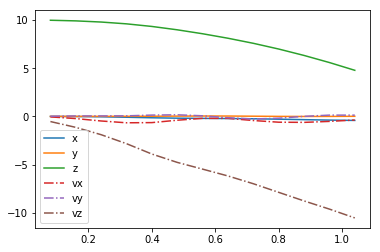

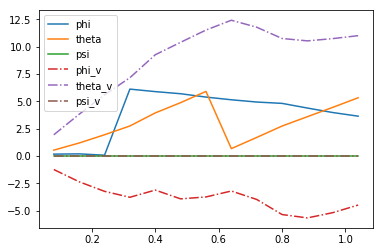

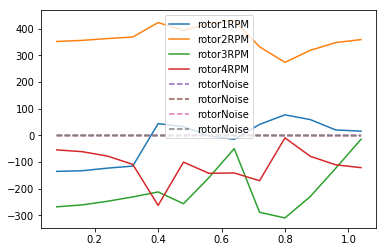

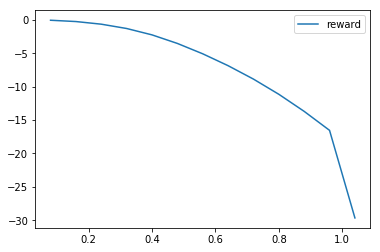

Epi:    5, score: -29.64277 (best: -0.03950) in epi 4, BestEpiCnt: 2, goalCnt: 0
Epi:    6, score: -41.93581 (best: -0.03825) in epi 6, BestEpiCnt: 3, goalCnt: 0


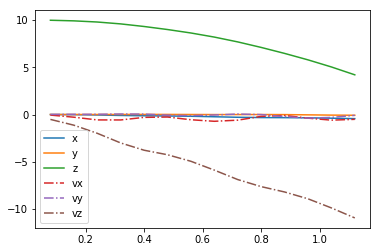

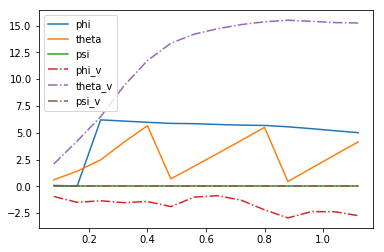

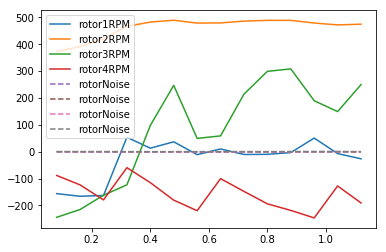

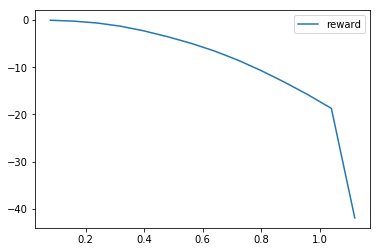

Epi:    7, score: -42.46863 (best: -0.00620) in epi 7, BestEpiCnt: 4, goalCnt: 0


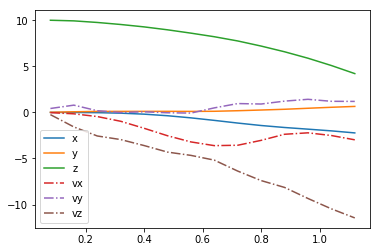

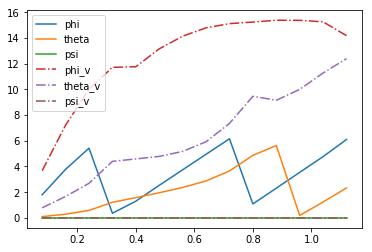

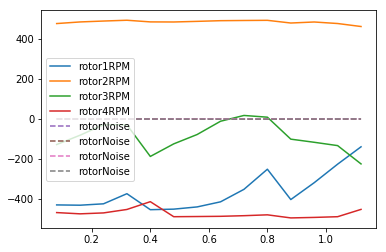

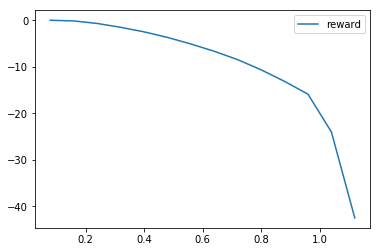

Epi:    8, score: -35.98033 (best: 4.48021) in epi 8, BestEpiCnt: 5, goalCnt: 0


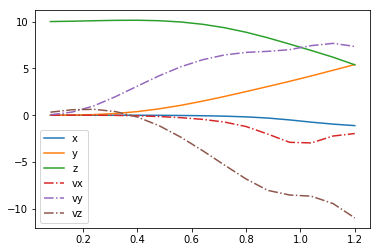

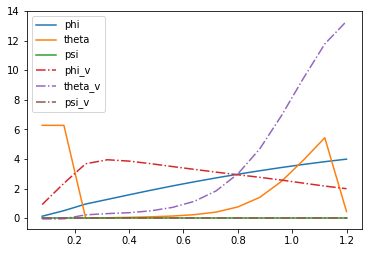

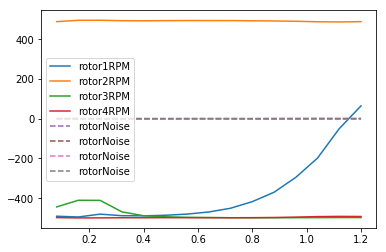

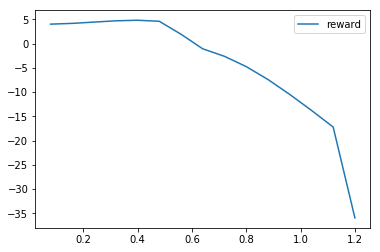

Epi:    9, score: -41.89627 (best: 5.98417) in epi 9, BestEpiCnt: 6, goalCnt: 0


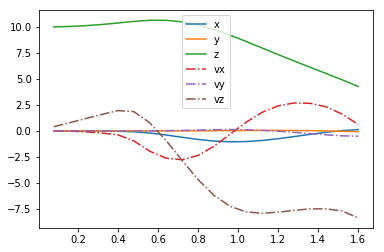

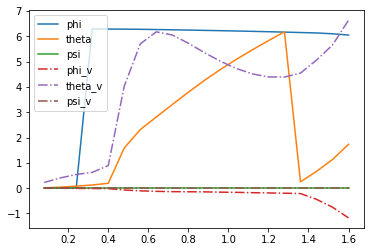

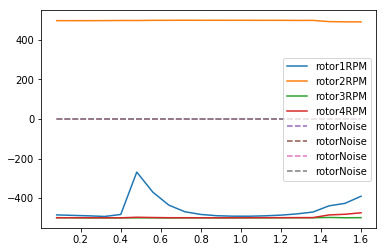

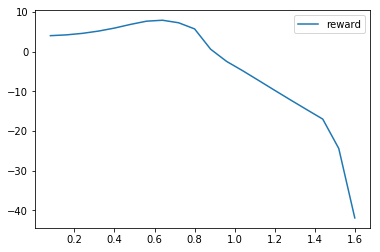


GOAL REACHED! Distance:  2.45983226555

GOAL REACHED! Distance:  2.34525797476

GOAL REACHED! Distance:  2.23546279122

GOAL REACHED! Distance:  2.13145408847

GOAL REACHED! Distance:  2.03439960423
Epi:   10, score: 862.50685 (best: 111.65155) in epi 10, BestEpiCnt: 7, goalCnt: 5


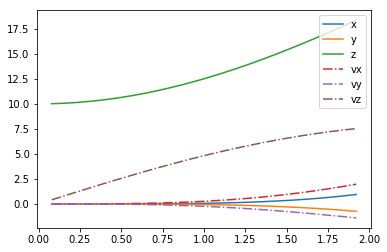

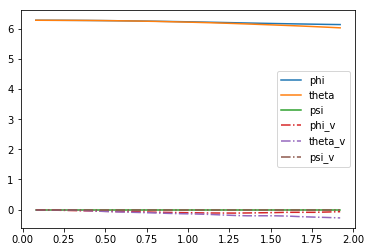

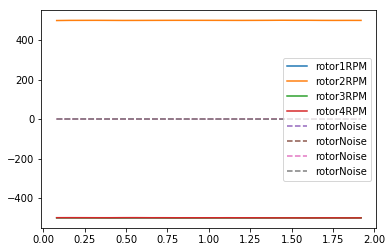

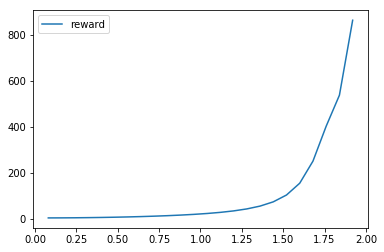


GOAL REACHED! Distance:  2.40954727109

GOAL REACHED! Distance:  2.26778403053
Epi:   11, score: 645.40014 (best: 111.65155) in epi 10, BestEpiCnt: 7, goalCnt: 7


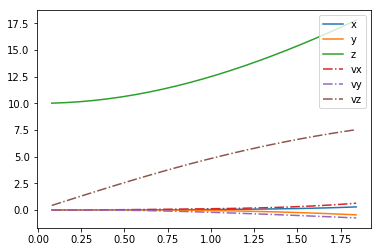

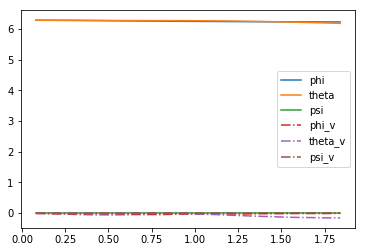

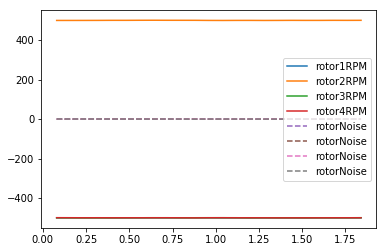

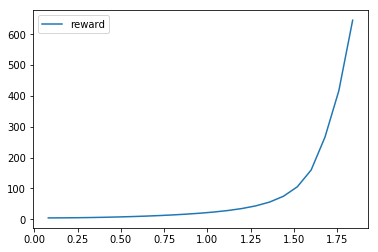


GOAL REACHED! Distance:  2.39182988191

GOAL REACHED! Distance:  2.24979333036
Epi:   12, score: 645.50618 (best: 111.65155) in epi 10, BestEpiCnt: 7, goalCnt: 9


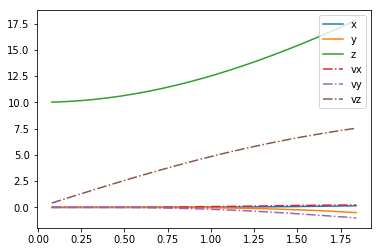

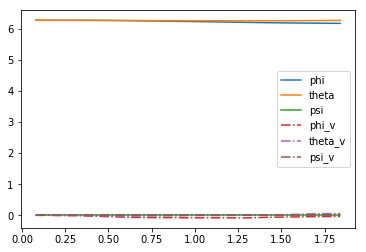

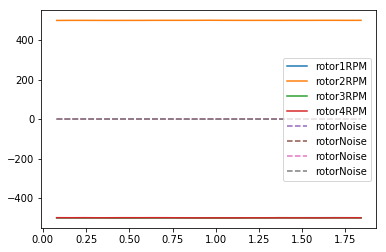

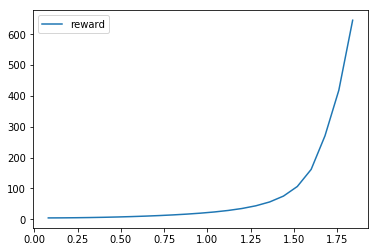


GOAL REACHED! Distance:  2.42779840027

GOAL REACHED! Distance:  2.28791475609
Epi:   13, score: 645.29163 (best: 111.65155) in epi 10, BestEpiCnt: 7, goalCnt: 11


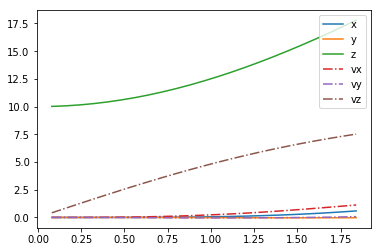

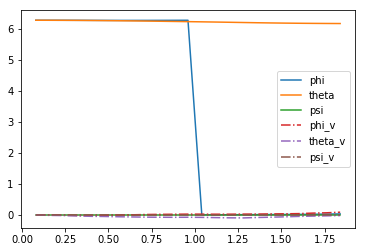

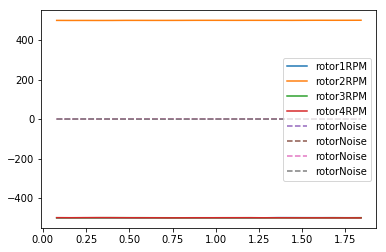

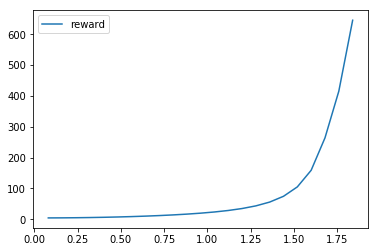

Epi:   14, score: -42.29664 (best: 111.65155) in epi 10, BestEpiCnt: 7, goalCnt: 11

GOAL REACHED! Distance:  2.49900379632

GOAL REACHED! Distance:  2.3508954492

GOAL REACHED! Distance:  2.20211150225
Epi:   15, score: 753.24961 (best: 111.65155) in epi 10, BestEpiCnt: 7, goalCnt: 14


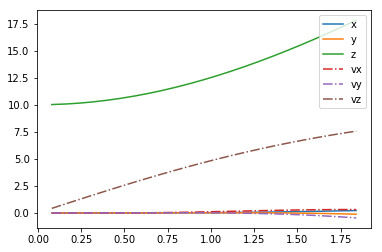

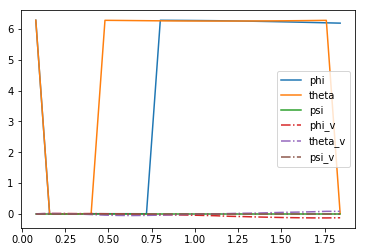

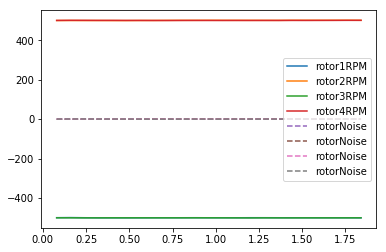

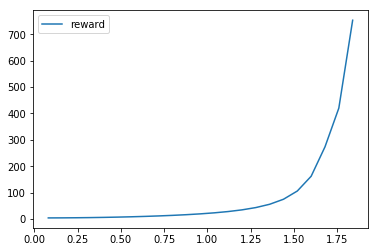

Epi:   16, score: -42.96332 (best: 116.88934) in epi 16, BestEpiCnt: 8, goalCnt: 14


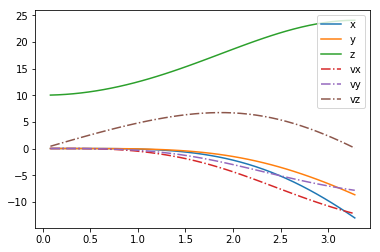

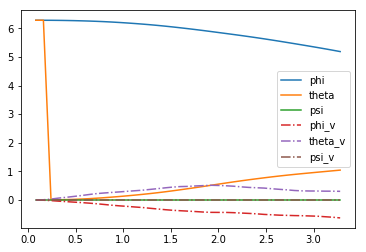

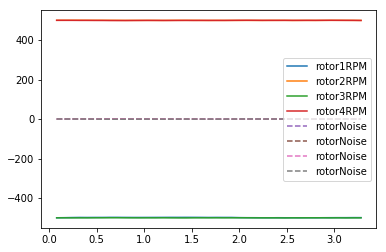

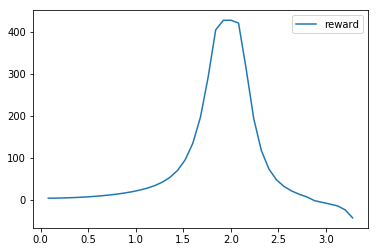

Epi:   17, score: -41.69899 (best: 116.88934) in epi 16, BestEpiCnt: 8, goalCnt: 14

GOAL REACHED! Distance:  2.44314820023

GOAL REACHED! Distance:  2.30423364561
Epi:   18, score: 645.20011 (best: 116.88934) in epi 16, BestEpiCnt: 8, goalCnt: 16


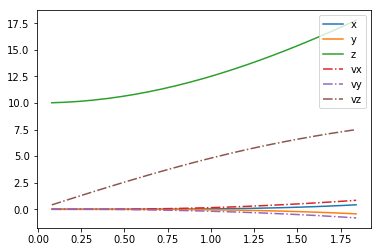

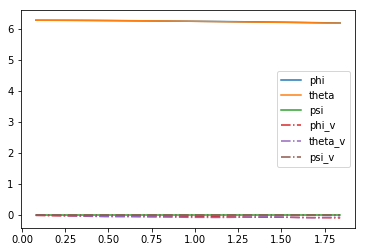

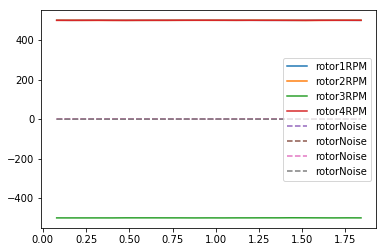

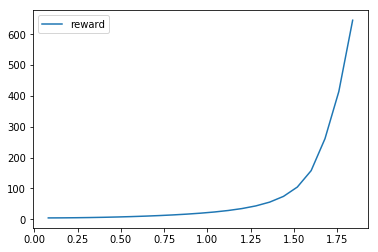


GOAL REACHED! Distance:  2.41840351875

GOAL REACHED! Distance:  2.27882449992
Epi:   19, score: 645.34814 (best: 116.88934) in epi 16, BestEpiCnt: 8, goalCnt: 18


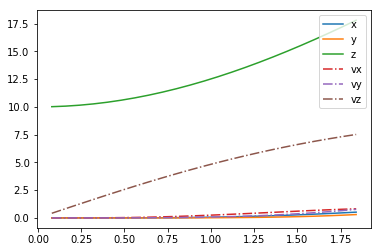

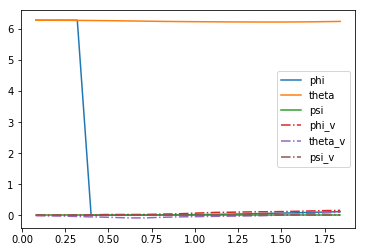

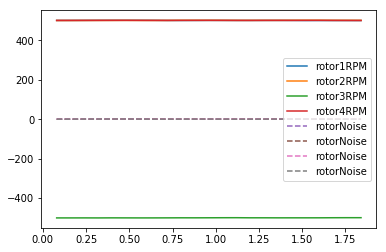

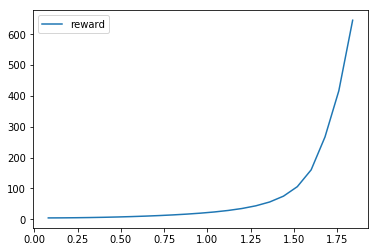


GOAL REACHED! Distance:  2.49734601804

GOAL REACHED! Distance:  2.34785107223

GOAL REACHED! Distance:  2.19739721026
Epi:   20, score: 753.26895 (best: 116.88934) in epi 16, BestEpiCnt: 8, goalCnt: 21


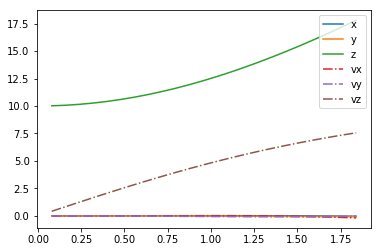

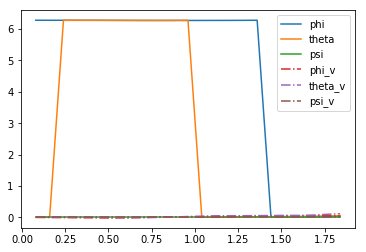

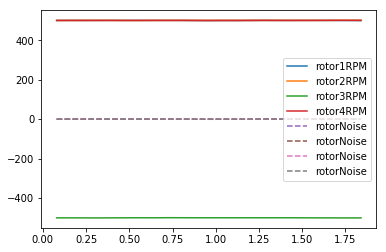

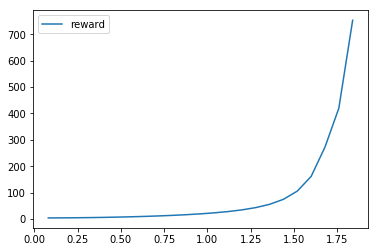

completed simulation



In [17]:
# Fly to Goal "Straight Up" (Default Agent, Custom Reward)
# Close other sessions
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

# Setup GPU TF stability
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(
  allow_soft_placement=True, log_device_placement=True))

import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import TaskDefault, TaskFlyUp, TaskFlyTowardsGoal
from runSimulation import runSimulation

# init task (reward structure), and agent
# simulation time and number of episodes
init_pose = np.array([0., 0., 10.0, 0., 0., 0.])
target_pose = np.array([0., 0., 20.]) #SMM original [0., 0., 10.]
simTime = 5 # make the sim run longer so the agent has more chance to adapt
num_episodes = 1000
task = TaskFlyTowardsGoal(init_pose=init_pose, target_pos=target_pose, runtime=simTime)
useDefault = True
my_agent = DDPG(task, useDefault) 
print(my_agent)
print(task)
print("init_pose: ", init_pose)
print("target_pose: ", target_pose)

# Run the simulation and save the results.
showPlotEachEpisode = False
file_output = 'default_agent_fly_up.txt' # save my results

runSimulation(init_pose, target_pose, simTime, num_episodes, task, my_agent,\
              showPlotEachEpisode, file_output)

init_pose:  [  0.   0.  10.   0.   0.   0.]
target_pose:  [  0.   0.  20.]
found best score of -0.046994 reducing exploration noise theta bias to 0.14
found best score of -0.046994 reducing exploration noise sigma to 0.50
Epi:    1, score: -41.68655 (best: -0.04699) in epi 1, BestEpiCnt: 1, goalCnt: 0


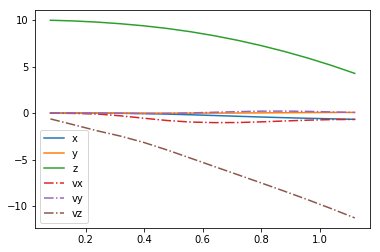

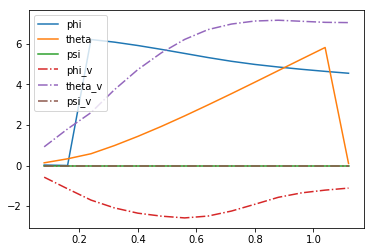

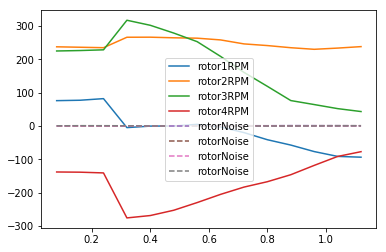

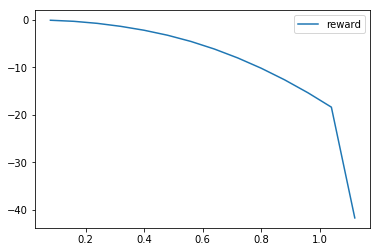

found best score of -0.046966 reducing exploration noise theta bias to 0.14
found best score of -0.046966 reducing exploration noise sigma to 0.50
Epi:    2, score: -41.68554 (best: -0.04697) in epi 2, BestEpiCnt: 2, goalCnt: 0


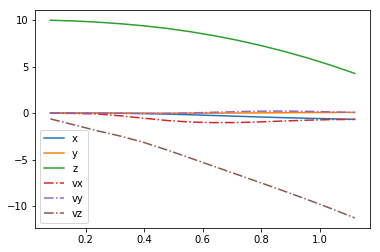

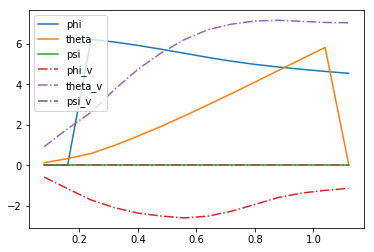

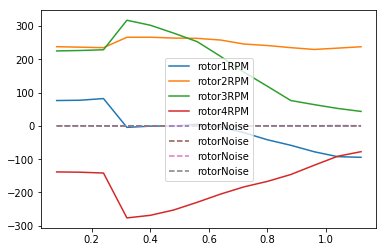

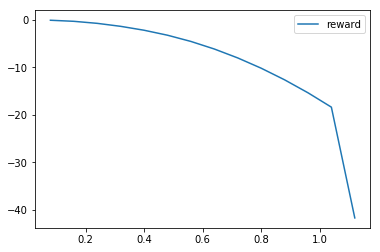

found best score of -0.046939 reducing exploration noise theta bias to 0.13
found best score of -0.046939 reducing exploration noise sigma to 0.50
Epi:    3, score: -41.68832 (best: -0.04694) in epi 3, BestEpiCnt: 3, goalCnt: 0


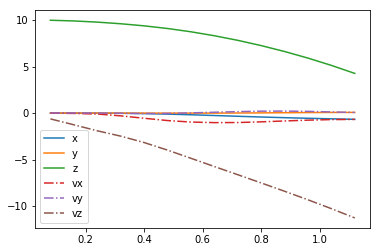

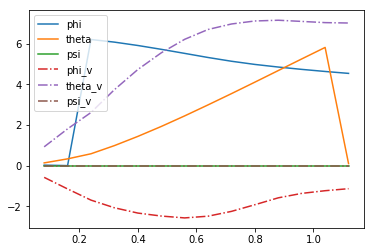

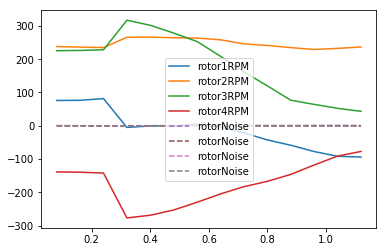

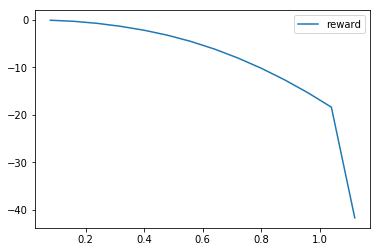

Epi:    4, score: -41.67432 (best: -0.04694) in epi 3, BestEpiCnt: 3, goalCnt: 0
Epi:    5, score: -41.59222 (best: -0.04694) in epi 3, BestEpiCnt: 3, goalCnt: 0
found best score of -0.036190 reducing exploration noise theta bias to 0.12
found best score of -0.036190 reducing exploration noise sigma to 0.50
Epi:    6, score: -42.81424 (best: -0.03619) in epi 6, BestEpiCnt: 4, goalCnt: 0


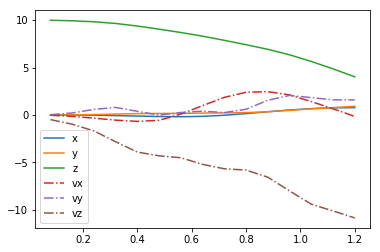

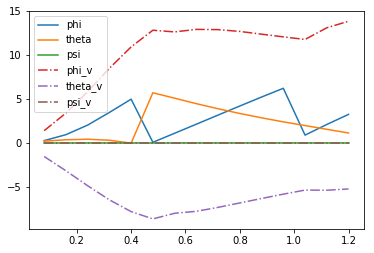

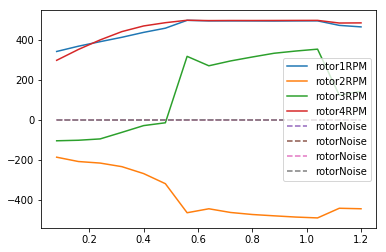

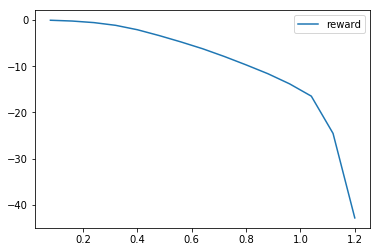

found best score of 4.024217 reducing exploration noise theta bias to 0.12
found best score of 4.024217 reducing exploration noise sigma to 0.50
found best score of 4.066360 reducing exploration noise theta bias to 0.11
found best score of 4.066360 reducing exploration noise sigma to 0.50
found best score of 4.086997 reducing exploration noise theta bias to 0.10
found best score of 4.086997 reducing exploration noise sigma to 0.50
Epi:    7, score: -43.63063 (best: 4.08700) in epi 7, BestEpiCnt: 5, goalCnt: 0


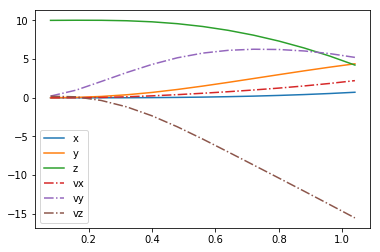

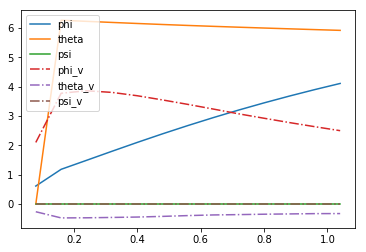

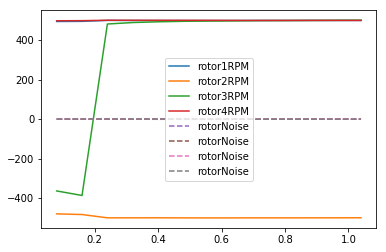

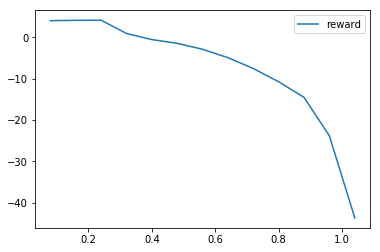

found best score of 4.137103 reducing exploration noise theta bias to 0.10
found best score of 4.137103 reducing exploration noise sigma to 0.50
found best score of 4.291988 reducing exploration noise theta bias to 0.09
found best score of 4.291988 reducing exploration noise sigma to 0.50
found best score of 4.507268 reducing exploration noise theta bias to 0.09
found best score of 4.507268 reducing exploration noise sigma to 0.50
found best score of 4.782948 reducing exploration noise theta bias to 0.09
found best score of 4.782948 reducing exploration noise sigma to 0.50
found best score of 5.117823 reducing exploration noise theta bias to 0.08
found best score of 5.117823 reducing exploration noise sigma to 0.50
found best score of 5.509588 reducing exploration noise theta bias to 0.08
found best score of 5.509588 reducing exploration noise sigma to 0.50
found best score of 5.954512 reducing exploration noise theta bias to 0.07
found best score of 5.954512 reducing exploration noise

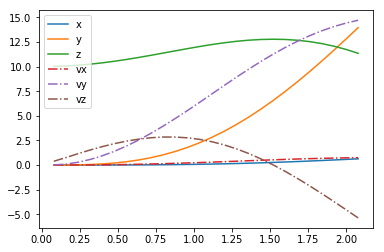

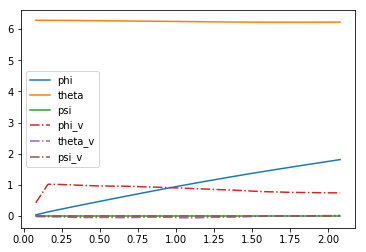

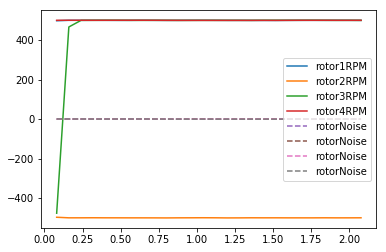

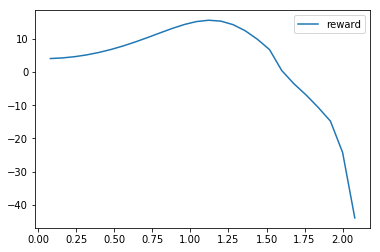

found best score of 10.426797 reducing exploration noise theta bias to 0.05
found best score of 10.426797 reducing exploration noise sigma to 0.50
found best score of 10.886749 reducing exploration noise theta bias to 0.05
found best score of 10.886749 reducing exploration noise sigma to 0.50
found best score of 11.291591 reducing exploration noise theta bias to 0.05
found best score of 11.291591 reducing exploration noise sigma to 0.50
found best score of 11.599830 reducing exploration noise theta bias to 0.05
found best score of 11.599830 reducing exploration noise sigma to 0.50
found best score of 11.766658 reducing exploration noise theta bias to 0.05
found best score of 11.766658 reducing exploration noise sigma to 0.50
Epi:    9, score: -35.92685 (best: 11.76666) in epi 9, BestEpiCnt: 7, goalCnt: 0


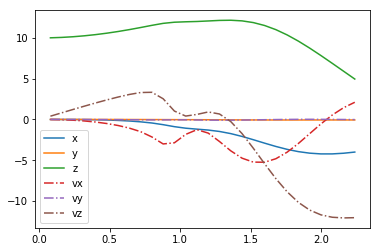

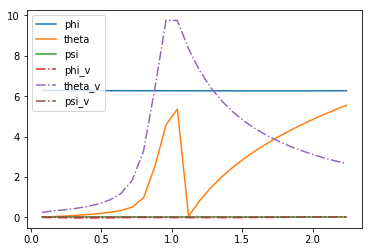

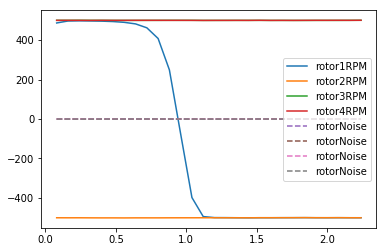

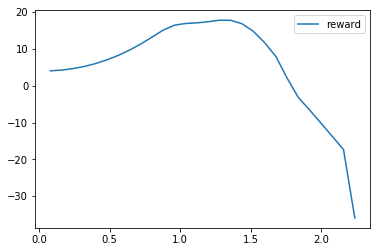

found best score of 13.075180 reducing exploration noise theta bias to 0.05
found best score of 13.075180 reducing exploration noise sigma to 0.50
found best score of 14.945112 reducing exploration noise theta bias to 0.05
found best score of 14.945112 reducing exploration noise sigma to 0.50
found best score of 17.319430 reducing exploration noise theta bias to 0.05
found best score of 17.319430 reducing exploration noise sigma to 0.50
found best score of 20.469148 reducing exploration noise theta bias to 0.05
found best score of 20.469148 reducing exploration noise sigma to 0.50
found best score of 24.891932 reducing exploration noise theta bias to 0.05
found best score of 24.891932 reducing exploration noise sigma to 0.50
found best score of 31.574345 reducing exploration noise theta bias to 0.05
found best score of 31.574345 reducing exploration noise sigma to 0.50
found best score of 42.671852 reducing exploration noise theta bias to 0.05
found best score of 42.671852 reducing exp

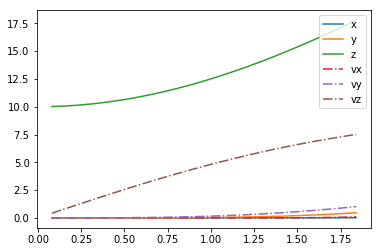

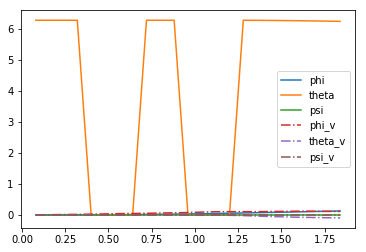

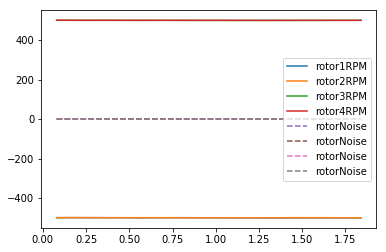

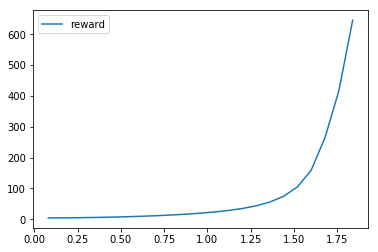


GOAL REACHED! Distance:  2.38478793124

GOAL REACHED! Distance:  2.24029786029
found best score of 85.580814 reducing exploration noise theta bias to 0.05
found best score of 85.580814 reducing exploration noise sigma to 0.50
Epi:   11, score: 645.54718 (best: 85.58081) in epi 11, BestEpiCnt: 9, goalCnt: 4


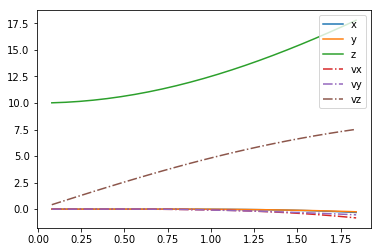

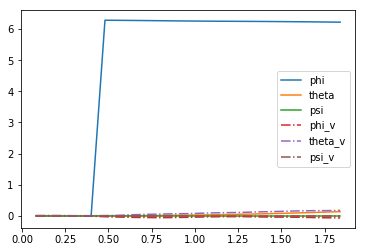

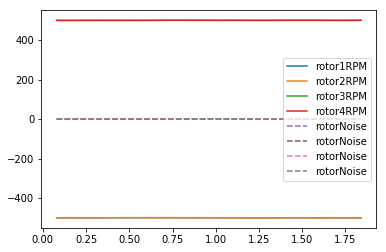

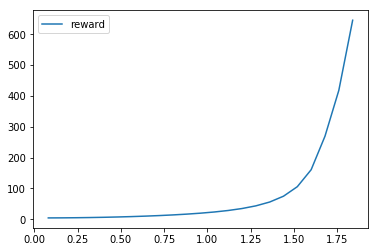


GOAL REACHED! Distance:  2.36134080286

GOAL REACHED! Distance:  2.21419951363
found best score of 85.959356 reducing exploration noise theta bias to 0.05
found best score of 85.959356 reducing exploration noise sigma to 0.50
Epi:   12, score: 645.68683 (best: 85.95936) in epi 12, BestEpiCnt: 10, goalCnt: 6


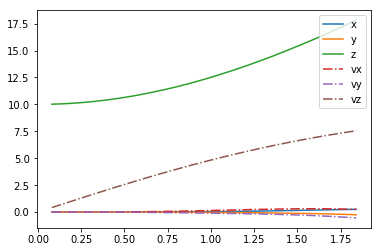

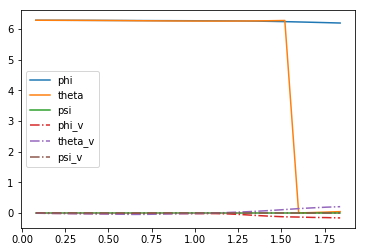

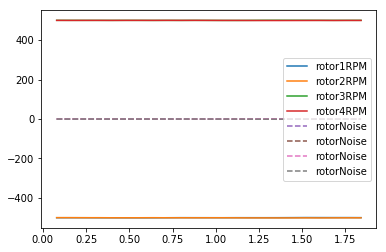

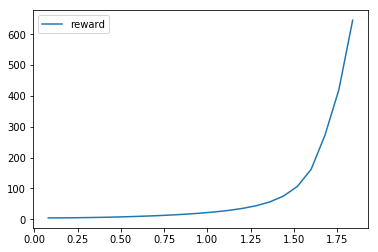


GOAL REACHED! Distance:  2.44579313041

GOAL REACHED! Distance:  2.31035306335
Epi:   13, score: 645.18548 (best: 85.95936) in epi 12, BestEpiCnt: 10, goalCnt: 8


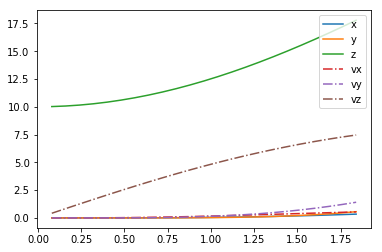

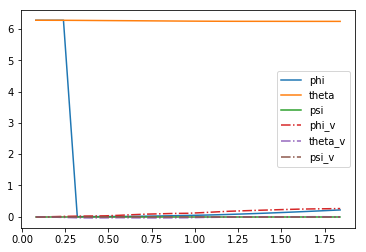

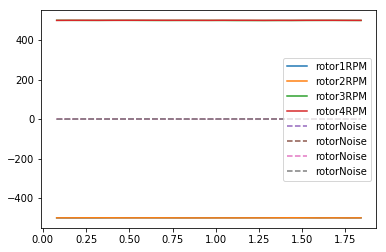

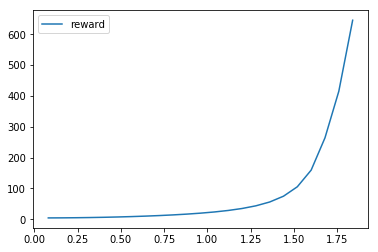


GOAL REACHED! Distance:  2.38899810047

GOAL REACHED! Distance:  2.2440687858
Epi:   14, score: 645.52214 (best: 85.95936) in epi 12, BestEpiCnt: 10, goalCnt: 10


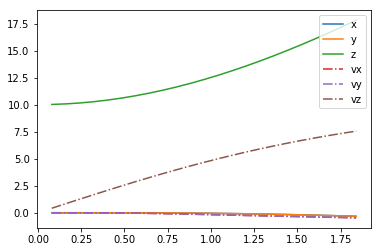

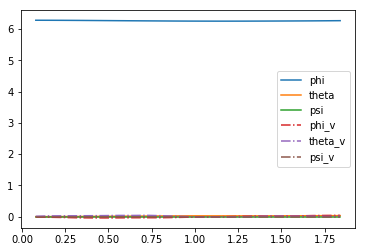

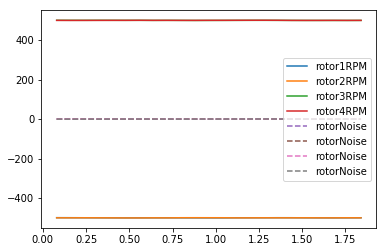

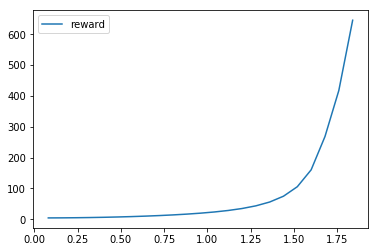


GOAL REACHED! Distance:  2.36611135228

GOAL REACHED! Distance:  2.22041028778
found best score of 85.991015 reducing exploration noise theta bias to 0.05
found best score of 85.991015 reducing exploration noise sigma to 0.50
Epi:   15, score: 645.65870 (best: 85.99102) in epi 15, BestEpiCnt: 11, goalCnt: 12


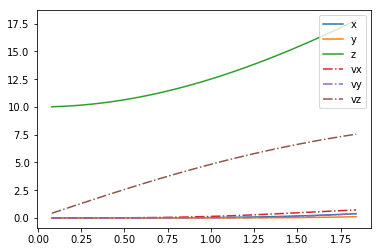

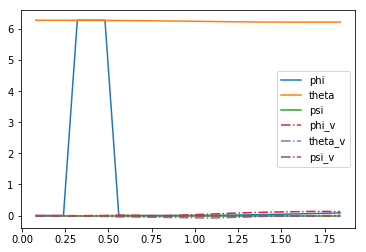

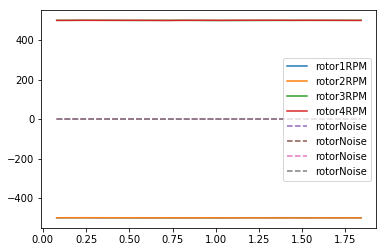

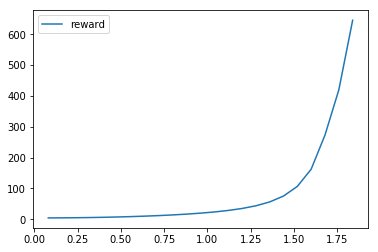


GOAL REACHED! Distance:  2.41042211145

GOAL REACHED! Distance:  2.26894620104
Epi:   16, score: 645.39504 (best: 85.99102) in epi 15, BestEpiCnt: 11, goalCnt: 14


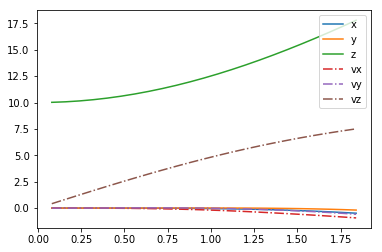

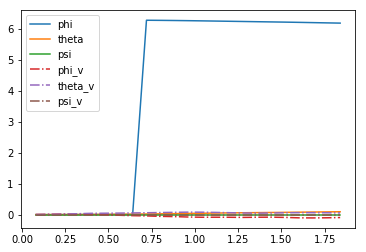

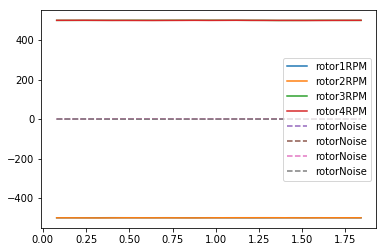

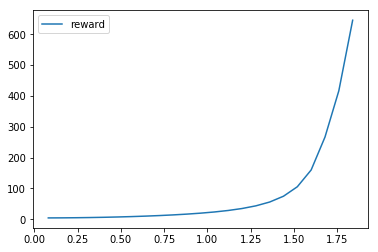


GOAL REACHED! Distance:  2.38886738785

GOAL REACHED! Distance:  2.24392364922
Epi:   17, score: 645.52272 (best: 85.99102) in epi 15, BestEpiCnt: 11, goalCnt: 16


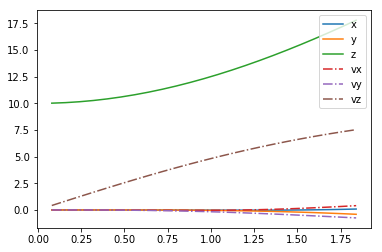

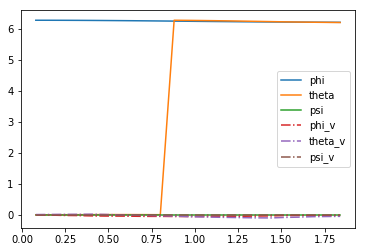

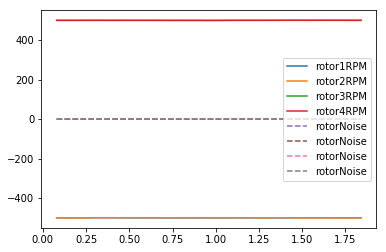

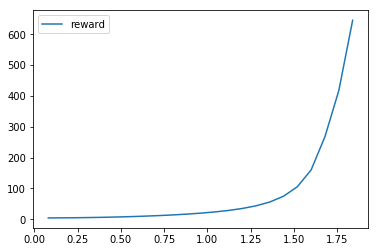


GOAL REACHED! Distance:  2.45642515516

GOAL REACHED! Distance:  2.3224271018
Epi:   18, score: 645.12254 (best: 85.99102) in epi 15, BestEpiCnt: 11, goalCnt: 18


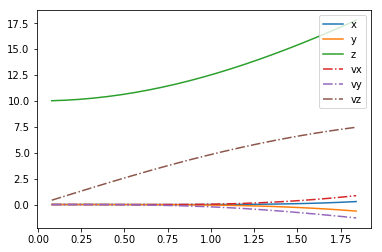

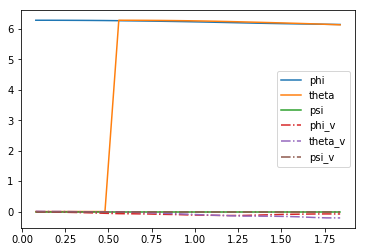

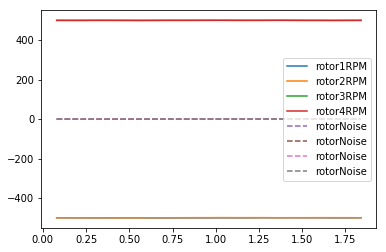

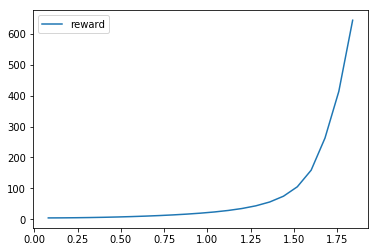


GOAL REACHED! Distance:  2.36327730559

GOAL REACHED! Distance:  2.21471562291
Epi:   19, score: 645.67462 (best: 85.99102) in epi 15, BestEpiCnt: 11, goalCnt: 20


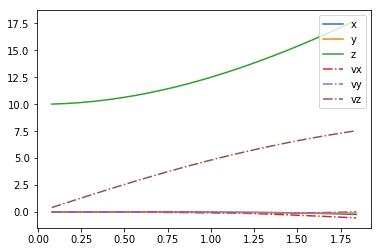

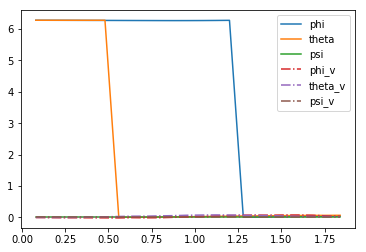

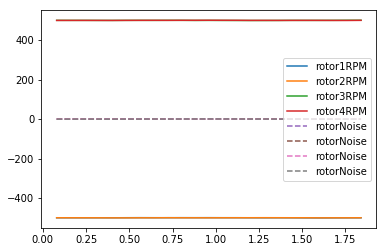

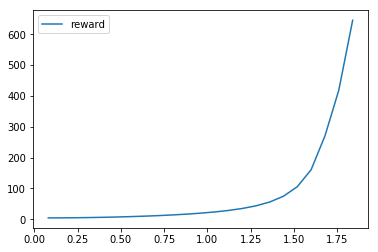


GOAL REACHED! Distance:  2.35501097294

GOAL REACHED! Distance:  2.20826811268
found best score of 86.178434 reducing exploration noise theta bias to 0.05
found best score of 86.178434 reducing exploration noise sigma to 0.50
Epi:   20, score: 645.72482 (best: 86.17843) in epi 20, BestEpiCnt: 12, goalCnt: 22


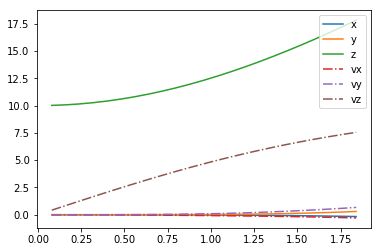

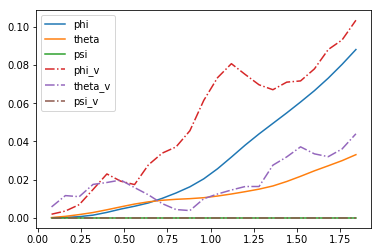

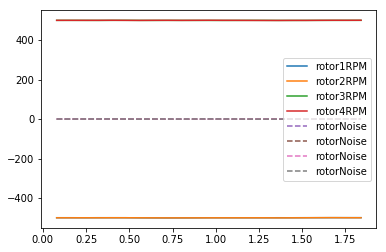

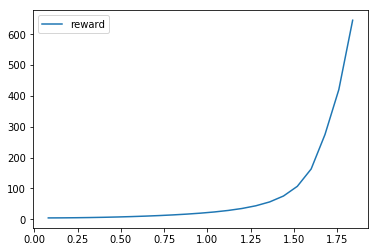

completed simulation



In [18]:
# Fly to Goal "Straight Up" (Custom Agent, Custom Reward)

# Close other sessions
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

# Setup GPU TF stability
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
sess = tf.Session(config=tf.ConfigProto(
  allow_soft_placement=True, log_device_placement=True))

import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import TaskDefault, TaskFlyUp, TaskFlyTowardsGoal
from runSimulation import runSimulation

# init task (reward structure), and agent
# simulation time and number of episodes
init_pose = np.array([0., 0., 10.0, 0., 0., 0.])
target_pose = np.array([0., 0., 20.]) #SMM original [0., 0., 10.]
simTime = 5 # make the sim run longer so the agent has more chance to adapt
num_episodes = 1000
task = TaskFlyTowardsGoal(init_pose=init_pose, target_pos=target_pose, runtime=simTime)
useDefault = False
my_agent = DDPG(task, useDefault) 
print(my_agent)
print(task)
print("init_pose: ", init_pose)
print("target_pose: ", target_pose)

# Run the simulation and save the results.
showPlotEachEpisode = False
file_output = 'my_agent_fly_up.txt' # save my results

runSimulation(init_pose, target_pose, simTime, num_episodes, task, my_agent,\
              showPlotEachEpisode, file_output)




## Conclusions

### Rewards are King

The reward function seems by far the hardest thing to get right, and also the things with the least amount of guidance in the course so far. Since the reward function is task and environment specific, nothing taught in the RL section of this course gave any useful insight into how to craft RL reward functions, especially for a copter in a physics simulation. Basically, the RL Udacity lessons only covered to agent design part of the project, and completely missed the mark on gives enough guidance and practice on designing the extremely important reward function.

The reward and the learning rate parameters are coupled. This means if either of these are too large the agent can adapt and change too quicking from the initial random weights, and easily get stuck in a local minimum. To counter this, it is best to keep one fixed, and make the other smaller and smaller until the agent stops getting stuck so easily. Unfortunately, this also has the affect of making the agent learn more slowly.

Trying to control angles in the reward function was difficult, especially because of the limited physics simulation. It was much easier to control higher level properties such as linear position and linear velocity, and let the agent figure out how to best achieve those goals. Furthermore, accelerations did not appear computationally smooth compared to the velocity slope, so were best avoided.

Try and make the reward function continuous (avoid spikes in the reward function by just adding and subtracting signal large numbers not proportional to the agents motion), bounded (especially on a lower bound), and balanced with respect to positive and negative rewards, though I noticed a bias towards positive rewards useful to keep the agent progressing, as long as bad behavior did not yield a positive reward. 

Too much negative rewards and the agent will try to get out as soon as possible, often just crashing to the ground, to avoid gathering more negatives. Too little positive rewards and the agent will take a long time to learn the right behavior, as the correct behavior will not have enough weight in the experiences used in network training. Clipping in the reward function are best avoided, since this will make the reward function return no information, just like clipping out of dynamic range in an analog to digital system.

Total reward was often much more useful as an indicator of an agent's performance during an episode than average reward (dividing by the count in the sim). This is because it acted like an integrator over the whole episode, rather and an instant measurement of the agent's performance. Furthermore, this could make agents look good if they gather some rewards quickly then crash into the ground straight away, such as in take-off scenarios, so total reward was especially valuable when the agent started on or near the ground. However, this type of total reward can also reward agents that diverge into bad performance at the end of an episode, peaking earlier. Therefore, both total reward and average reward have their drawbacks when evaluating agent performance. 

Early exit was essential for making the training more efficient. For the poor performing episodes, once the agent does badly at a task, there is little point continuing on, better to quit and start again. Also, once the agent does better than it has before, and then stops doing better (reward gradient goes negative), is also a good stopping point to preserve a good episode to learn from, instead of just waiting for the agent to do something stupid before ending, which can corrupt what could be a positive learning experience into somewhat of a bad one. To do this properly, I had to design the reward function to start at 0, then become positive if the agent moved towards the goal, and negative if the agent moved away from the goal. To ensure this algorithm would work regardless of starting position, I used the initial range to the goal, and the current range to the goal as a normalization function. Finally, a done condition and a big reward when the agent is near the goal is essential to tell the agent it has completed the task (I use 25% remaining of starting distance at the termination condition).

It seems that good rewards are something similar to having good labels and a good dataset in supervised learning. Often they make a bigger difference, at least initially, than the network structure itself (unless it is a massive breakthrough like Deep CNNs).

### Different Agents weren't so Different

I wasted a lot of time on this. I should have just used the default agent, got a reward function that kind of worked, then tuned from there for performance. Mostly the agent design didn't seem to matter not nearly as much as the reward function. Hyper-paramters gamma and tau did not seem to have a large effect on the agent. Most of their effect on slowing down the leaning could be addressed by bounding and tuning the reward function. 

That said, different network sizes seemed to smooth the agent behavior and allow more sophisticated actions, though it did not make the difference between whether the agent could learn to achieve the goal or not. Most of that appeared to came down to the reward function. Dropout did show decent help is regularizing the result, and stopping the reward function getting really stuck, but the agents actions tended to appear too random, and training would probably take a lot longer to stabilize. Batch normalization has extremely negative effects and stops the agent learning (also wasting a lot of my own time, though I may have implemented it incorrectly).

The replay buffer is really useful, though the default size seemed more than enough. It allowed the agent to sample the search space without training too much, since once the agent starts learning, it will tend to follow certain patterns that it has already learned over and over. A large buffer means that especially early on, there is a more diverse set of experiences that are randomly sampled, rather than those the agent has already "chosen" by already starting to learn, hence having experiences that tended to be correlated with its previous ones and never getting the change to try many action sequences at all. It would be an interesting concept to use a second memory buffer as a placeholder for rare events where the agent performed well (high total episode reward), so they can be selectively sampled from later with priority (I believe there are some papers on this, though I haven't looked in detail). 

One thing though, the policy search agent calculation of the average score is deceptive, since in the DDPG agent we use memory, we cannot use the reward from the learn as an indication of success. Instead we must use the reward that actually is happening at that time, the step function reward.

### On the Take-Off Task and The Physics Simulator

Sometimes, one makes things much harder on oneself than need be. I made this project very hard on myself. Early on, I changed the initial starting position of the copter to (0,0,0) for a take off task, instead of the default hover task of (0,0,10), which is much easier to debug and fights less with the physics simulator. 

This left me to spending dozens of hours trying to get the DDPG agent to complete the much more difficult task of taking of from an initial height of 0, which means that any minor error in flight will trip the lower boundary check of the  engine and immediately end the sim (this is a rather bad simulation of drone take-off, since normally, and per Newtonian Mechanics, the ground provides and equal and opposite reaction to the drone, instead of killing it). 

Depening on how the reward function is setup (i.e. unless you give it crazy high rewards for going up), this can often lead the agent to getting stuck at ground 0, tripping the engine over and over again after a single iteration, learning nothing of value. I did manage to hack around this by changing the source code of the physics sim and removing the "done" condition that triggers when the agent hits zero z position. Instead, I just reseting the z position and all velocities and accelerations to zero to simulate a crash (something I believe you should already have done in your engine). This at least allowed the agent to try and take of multiple times during the duration of the sim, rather than do whatever it would to minimise negative rewards by crashing straight away.

In the end, I had to do a lot of research and try change pretty much every aspect of the code to try and get it work (over a hundred changes to the reward function, plus agent changes including layer sizes, layer depth, batch normalization, dropout, simulated annealing, larger memory replay, and so on). Remarkedly, even taking off from ground zero, the agent is able to train to a point where for most training cycles it manages to best the physics engine and actaully learn something, though it can still get stuck if I do not reward going up quite enough. It is also difficult to see a general trend in the learning process from the reward function mean alone, and it would be interesting to have other insight into the learning process, such as the critic Q values. 

### Final Thoughts and Feedback

I spent at least 50 hours on this project. 2-4 times more than any other project in the Nanodegree so far. While I learned a lot, it was a very frustrating experience. It didn't help that Jupyter notebooks don't seem to reload external .py files unless you restart the kernel, so I wasted heaps of time trying things that were not actually loading into the notebook, leading to false conclusions. I would recommend everyone do their work outside Jupyter, such as with Spyder, to ensure all changes to the agent and task are properly re-loaded each time a test is performed.

More comments in the code would have be extremely useful. Not even the units of important values are described in most places. If I were code reviewing the source provided in this project, not just the physics engine porting, the feedback would be pretty brutal.

This is definitely the most open ended and least well structured project in the Machine Learning Nanodegree thus far. I know Reinforcement Learning is in many ways more difficult than supervised learning, but please do better in preparing the student. Most of the lesson material and example code in the lessons provied very little that could be directly used in this project. 

Especially missing was explaination of the physics engine and how the drone interacts with it, some general steps on how to complete some of the missing parts of the default agent, and tips and tricks of things to try for the reward function. Better native plotting support as part of the project would also be helpful. The guidance provived on the message boards was occassionlly helpful, but often sparse, lacking useful detail, and even at times sporting broken links to other students comments that were unaccessable. I managed to find a very helpful thread from 1 year ago on the knowledge hub, from a student that seemed to have been as frustrated with the project as me, but that was about it.

Please explain in more detail and with more guidance: the task, the steps, and explicit things to try before asking the student to proceed with the task. Different sections with lots of little things to build, with some way to validate them, then putting it all together at the end, would have made more sense. Complex tasks should be broken down into more managable steps. There are so many moving pieces, and none of them are explained particularly well.

Having a project set up so poorly that being allowed to, almost expected to, submit without getting anything to work at all is not acceptable. It leaves one with the feeling that it was all pointless and nothing was learned at all (by both the student and the agent).
 

## References

* [1] DDPGs in TensorFlow (example network): https://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html
* [2] Why Dropout isn't used in RL: https://ai.stackexchange.com/questions/8293/why-do-you-not-see-dropout-layers-on-reinforcement-learning-examples
* [3] RL is hard and doesn't really work yet: https://www.alexirpan.com/2018/02/14/rl-hard.html
* [4] Crafting reward functions: https://medium.com/@BonsaiAI/deep-reinforcement-learning-models-tips-tricks-for-writing-reward-functions-a84fe525e8e0
* [5] Actor-Critic Models with Keras and OpenAI: https://towardsdatascience.com/reinforcement-learning-w-keras-openai-actor-critic-models-f084612cfd69
* [6] Intro to Advantage Actor-Critic Networks: https://medium.freecodecamp.org/an-intro-to-advantage-actor-critic-methods-lets-play-sonic-the-hedgehog-86d6240171d
* [7] Batch Normalization with Keras https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/
* [8] Usefulness of Experience Replay: https://becominghuman.ai/learning-from-mistakes-with-hindsight-experience-replay-547fce2b3305
* [9] CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING TimothyP.Lillicrap, JonathanJ.Hunt, AlexanderPritzel, NicolasHeess, TomErez, YuvalTassa, DavidSilver&DaanWierstra
* [10] Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift. Sergey Ioffe, Christian Szeged
* [11] DeterministicPolicyGradientAlgorithms. DavidSilver, GuyLever, NicolasHeess, ThomasDegris, DaanWierstra, MartinRiedmiller 
* [12] SoftActor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor. TuomasHaarnoja, Aurick Zhou, Pieter Abbeel, Sergey Levine


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
# See the (too) many plots above

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: See the task section in the methods above.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you? 

**Answer**: The main thing was the reward function. Making this smooth, continuous, and bounded in range without clipping seemed to have the biggest affect. After that, actually deciding what kind of behavior to incentivize, and how to do this time keeping the smooth-continous-bounded-unclipped reward structure, was really quite challenging. See results and conclusion section above

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)? 

**Answer**: All of these were left at the default values, since adjusting the reward function seems an easier knob to tune. The only thing that was tuned was the increased memory batch size to make it much larger, and the noise to make that larger but shrink each time a best reward was found, similar to simulated annealing.

- What neural network architecture did you use (if any)? 

**Answer**: I used a critic network and actor network that was larger than the original, which seemed to allow the agent to learn more interesting patterns. See methods second for the networks, and results and conclusion sections for the outcome.

See methods, results, and conclusion sections above for much more detailed analysis and design description.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: This was hard. Nothing really seemed to work well, and there was really little guidance provided in the lectures, on the boards, or in the project itself. The learning moments for myself was realizing that the physics engine was fighting with my agent in the take off task, which I easily wasted a dozen hours fighting with.

See results and conclusion section above.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: See conclusions section above.